## Importing Packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Preprocessing

In [2]:
# importing the dataset

from tensorflow.keras.datasets import cifar10

#### Data Description


The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

train.7z - a folder containing the training images in png format
test.7z - a folder containing the test images in png format
trainLabels.csv - the training labels

To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

The label classes in the dataset are:

* airplane 
* automobile 
* bird 
* cat 
* deer 
* dog 
* frog 
* horse 
* ship 
* truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.



In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
class_names = ['0: airplane','1: automobile','2: bird','3: cat',
               '4: deer','5: dog','6: frog','7: horse',
               '8: ship','9: truck']
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [5]:
print(f'Max: {x_train.max()}  Min: {x_train.min()}')

# due to image data we have the value range from 0-255, these are all of independent variable 


Max: 255  Min: 0


In [6]:
# whereas for dependent variable the value ranges from 0-9 to denotes the classes of the image
print(f"Max: {y_train.max()}  Min: {y_train.min()}")

Max: 9  Min: 0


In [7]:
### Normalize the dataset

x_train = x_train/255.0
x_test = x_test/255.0

# for faster and effective computation we are doing normalization of data

In [8]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [9]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

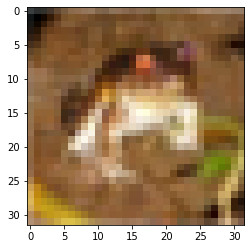

In [10]:
plt.imshow(x_train[0]);

In [11]:
y_train[0]

array([6], dtype=uint8)

## Building the CNN model

In [12]:
# defining a model as odject

model = tf.keras.models.Sequential()

In [13]:
# First convulutional Layer

'''
1) Number of filter's (kernel) = 32
2) Kernel size = 3
3) Padding = same
4) Activation Function = reLU
5) Input shape = (32, 32, 3)

'''

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size =3, 
                                 padding = 'same', activation = 'relu',
                                input_shape = [32,32,3] ))

In [14]:
# Adding Second CNN layer and maxpool layers

'''
1) Number of filter's (kernel) = 32
2) Kernel size = 3
3) Padding = same
4) Activation Function = reLU

'''
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,
                                padding = 'same',activation = 'relu'))

# MaxPool layer parameter

'''
1) pool size = 2
2) strides = 2
3) padding = 'valid'

'''

model.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2, padding = 'valid'))

In [15]:
# Adding Third CNN layer

'''
1) Number of filter's (kernel) = 64
2) Kernel size = 3
3) Padding = same
4) Activation Function = reLU

'''

model.add(tf.keras.layers.Conv2D(filters = 64, padding  = 'same',
                                kernel_size = 3, activation = 'relu'))

In [16]:
# Adding Fourth CNN layer and MaxPool layer

'''
1) Number of filter's (kernel) = 64
2) Kernel size = 3
3) Padding = same
4) Activation Function = reLU

'''

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3,
                                activation = 'relu',padding = 'same'))


# MaxPool layer parameter

'''
1) pool size = 2
2) strides = 2
3) padding = 'valid'

'''

model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, 
                                    padding = 'valid'))

In [17]:
# Adding Dropout layer -- for regularization
 
model.add(tf.keras.layers.Dropout(0.4))

In [18]:
# Adding a Flattening layer

model.add(tf.keras.layers.Flatten())

In [19]:
# Adding First Dense layer

model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [20]:
# addiing second dense layer

model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

## Training the model

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',
             metrics = ['sparse_categorical_accuracy'])


In [23]:
model.fit(x_train, y_train,batch_size = 10, epochs = 5 , verbose = 2)

Epoch 1/5
5000/5000 - 143s - loss: 1.3918 - sparse_categorical_accuracy: 0.4958
Epoch 2/5
5000/5000 - 144s - loss: 0.9778 - sparse_categorical_accuracy: 0.6529
Epoch 3/5
5000/5000 - 137s - loss: 0.8407 - sparse_categorical_accuracy: 0.7022
Epoch 4/5
5000/5000 - 144s - loss: 0.7525 - sparse_categorical_accuracy: 0.7339
Epoch 5/5
5000/5000 - 137s - loss: 0.6907 - sparse_categorical_accuracy: 0.7556


## Model Evaluation and Prediction



In [26]:
# evaluate of model1

test_loss, test_accuarcy = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.7728 - sparse_categorical_accuracy: 0.7419


In [30]:
print('Accuracy: ',test_accuarcy)

Accuracy:  0.7419000267982483


In [31]:
# predictions

y_pred = model.predict(x_test)
y_pred = np.round(y_pred).astype(int)


In [36]:
# validation of result
'''
y_pred - predicted value
y_test - actual value
'''

y_pred [11], y_test[11]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([9], dtype=uint8))

In [37]:
y_pred[121], y_test[121]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([3], dtype=uint8))

In [38]:
y_pred[1765], y_test[1765]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([4], dtype=uint8))